# PERSONAL INFORMATION


*   Gabriela Navarro
*   Diego Sican
*   Sandra Soria






Este modelo tiene de pre-process unicamente realiza la normalización y se elimina columnas

## Preparations
Utilizamos estas librerias para poder manipular el dataset, la creación de gráficas y la visualización de los datos.

In [ ]:
# Importamos la librerias

In [ ]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf


# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

## 1) Dataset Preparations


In [ ]:
# Leemos el archivo "hear_data.csv" el cual cargamos los datos a nuestro entorno
raw_dataset = pd.read_csv("heart_data.csv")

In [ ]:
# For dataset manipulation
import pandas as pd

# Loading Dataset and have a glimpse about it
#column_names = ['rest_bp','chest_pain','Thallium Stress','age','fasting_bs',
               # 'max_hr', 'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression', 'rest_ecg', 'num_vessels', 'diagnosis' ]

raw_dataset = pd.read_csv("heart_data.csv",
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

In [ ]:
# Visualizamos el dataset por medio de columnas y filas
raw_dataset

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,130,2,2,62,0,97,0,0,1,263,1.2,0,1,1
293,100,3,0,58,0,122,0,0,1,248,1.0,2,0,0
294,138,3,0,59,0,182,0,1,0,271,0.0,2,0,0
295,130,3,2,56,1,103,1,1,2,283,1.6,2,0,1


In [ ]:
# Descriptivamente vemos los valores de las columnas y filas
raw_dataset.describe()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,131.693603,2.158249,0.835017,54.542088,0.144781,149.599327,0.326599,0.676768,0.602694,247.350168,1.055556,0.996633,0.676768,0.461279
std,17.762806,0.964859,0.956690,9.049736,0.352474,22.941562,0.469761,0.468500,0.618187,51.997583,1.166123,0.994914,0.938965,0.499340
min,94.000000,0.000000,0.000000,29.000000,0.000000,71.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,2.000000,0.000000,48.000000,0.000000,133.000000,0.000000,0.000000,0.000000,211.000000,0.000000,0.000000,0.000000,0.000000
50%,130.000000,2.000000,0.000000,56.000000,0.000000,153.000000,0.000000,1.000000,1.000000,243.000000,0.800000,1.000000,0.000000,0.000000
75%,140.000000,3.000000,2.000000,61.000000,0.000000,166.000000,1.000000,1.000000,1.000000,276.000000,1.600000,2.000000,1.000000,1.000000
max,200.000000,3.000000,2.000000,77.000000,1.000000,202.000000,1.000000,1.000000,2.000000,564.000000,6.200000,2.000000,3.000000,1.000000


##2) Pre-process


Para empezar a realizar el pre-process es necesario buscar que problemáticas nos puede dar al querer entrenar el modelo.

Algunas problemáticas que podemos observar son:

Debemos de normalizar la data ya que los valores del max y min fluctuan.

Es necesario balancear la data utilizando oversampling.



##Normalización
Es importante normalizar el minimo y maximo de las columnas ya que se espera obtener un rango con valores entre 0 y 1 ya que permitira que el aprendizaje del modelos sea mas simple.

In [ ]:
# Definamos la función de normalizacion
def normalize_min_max(column):
  # Extract column's max value
  max_value = np.max(column)
  # Extract column's min value
  min_value = np.min(column)
  return (column - min_value)/(max_value - min_value)

In [ ]:
# Extract all columns but the last one
columns_to_normalize = raw_dataset.columns
columns_to_normalize = columns_to_normalize[0:-1]

# Normalize columns
for column in columns_to_normalize:
  raw_dataset[column] = normalize_min_max(raw_dataset[column]);

# Una vez normalizado los valores, utilizamos describe() nuevamente para listar nuestras tablas
raw_dataset.describe()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.355600,0.719416,0.417508,0.532127,0.144781,0.599995,0.326599,0.676768,0.301347,0.277055,0.170251,0.498316,0.225589,0.461279
std,0.167574,0.321620,0.478345,0.188536,0.352474,0.175126,0.469761,0.468500,0.309093,0.118716,0.188084,0.497457,0.312988,0.499340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245283,0.666667,0.000000,0.395833,0.000000,0.473282,0.000000,0.000000,0.000000,0.194064,0.000000,0.000000,0.000000,0.000000
50%,0.339623,0.666667,0.000000,0.562500,0.000000,0.625954,0.000000,1.000000,0.500000,0.267123,0.129032,0.500000,0.000000,0.000000
75%,0.433962,1.000000,1.000000,0.666667,0.000000,0.725191,1.000000,1.000000,0.500000,0.342466,0.258065,1.000000,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4) Correlation Matrix
Con la matriz de correlación podemos visualizar la relación que existe entre las variables y en base a esto también podemos seleccionar las columnas que tienen una gran importancia para el modelo y descartar las que no afectarian.

<Axes: >

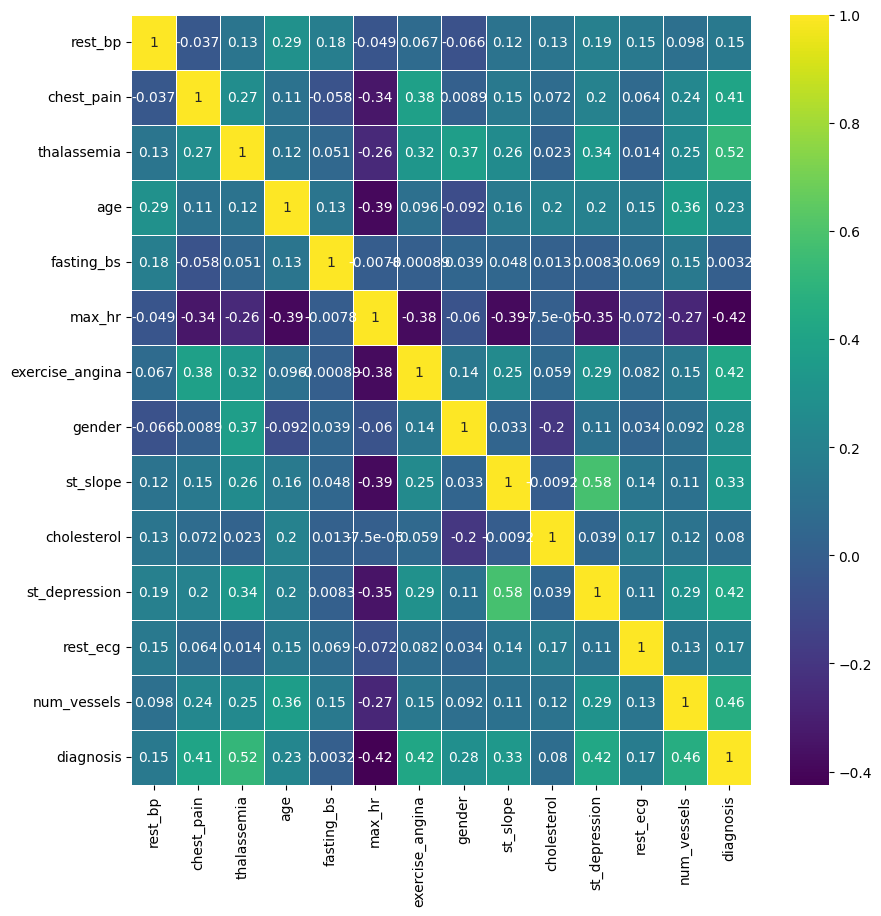

In [ ]:
# Matriz de correlation, utilizando corr() calclamos la matriz de correlacion dandonos posibles valores 
# entre -1 y 1
correlation_matrix = raw_dataset.corr()

# Ahora graficamos, dejando una matriz de nxn
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, linewidths=.5, cmap='viridis', annot=True)

In [ ]:
# Quitar columnas manualmente utilizando POP()
raw_dataset.pop('fasting_bs')
raw_dataset.pop('cholesterol')
raw_dataset.pop('rest_ecg')
raw_dataset.pop('rest_bp')

# Listamos los valores por columnas y filas
raw_dataset

,chest_pain,thalassemia,age,max_hr,exercise_angina,gender,st_slope,st_depression,num_vessels,diagnosis
0,1.000000,0.0,0.791667,0.541985,0.0,0.0,0.0,0.048387,0.666667,0
1,0.666667,0.0,0.437500,0.664122,0.0,0.0,0.5,0.258065,0.000000,0
2,1.000000,1.0,0.125000,0.648855,1.0,1.0,0.0,0.000000,0.000000,1
3,1.000000,1.0,0.708333,0.633588,0.0,0.0,0.5,0.645161,1.000000,1
4,1.000000,1.0,0.354167,0.374046,1.0,1.0,0.5,0.290323,0.666667,1
...,...,...,...,...,...,...,...,...,...,...
292,0.666667,1.0,0.687500,0.198473,0.0,0.0,0.5,0.193548,0.333333,1
293,1.000000,0.0,0.604167,0.389313,0.0,0.0,0.5,0.161290,0.000000,0
294,1.000000,0.0,0.625000,0.847328,0.0,1.0,0.0,0.000000,0.000000,0
295,1.000000,1.0,0.562500,0.244275,1.0,1.0,1.0,0.258065,0.000000,1


##5) Data argumentation

Class 0 :  160
Class 1 :  137


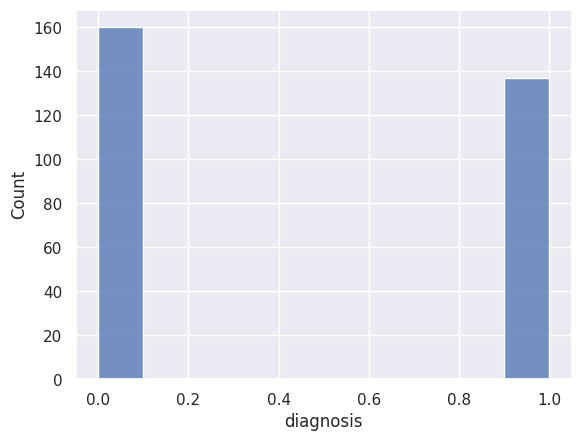

In [ ]:
# Obtenemos una lista de los valores únicos de la clase en la columna "diagnosis"
for i in raw_dataset["diagnosis"].unique():
  numRows = len(raw_dataset[raw_dataset['diagnosis'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Ploteamos el Histograma
sns.histplot(data=raw_dataset, x="diagnosis")
plt.show()

In [ ]:
# Frecuencia de cada clase en la columna "diagnosis"
values = raw_dataset['diagnosis'].value_counts()
values

diagnosis
0    160
1    137
Name: count, dtype: int64

##6) Callbacks

In [ ]:
# Splitting Dataset
train, test = train_test_split(raw_dataset, test_size=0.2) # ← Test is 20% and training is 80%

# Sepparating both sets into dependent and independent variables
independent_variables = list(raw_dataset.columns)
independent_variables.remove('diagnosis')
dependent_variables = ['diagnosis']

# Tomamos las variables dependientes e independientes
train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
# Vemos nuestros valores ya aplicado Oversampling
train

,chest_pain,thalassemia,age,max_hr,exercise_angina,gender,st_slope,st_depression,num_vessels,diagnosis
106,1.000000,1.0,0.604167,0.450382,1.0,1.0,0.5,0.483871,0.666667,1
163,1.000000,0.0,0.479167,0.679389,0.0,1.0,0.0,0.000000,0.333333,1
122,0.333333,0.0,0.250000,0.847328,0.0,1.0,0.0,0.000000,0.000000,0
236,1.000000,0.0,0.500000,0.549618,0.0,0.0,0.5,0.064516,0.000000,0
226,1.000000,0.0,0.500000,0.679389,0.0,0.0,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
215,0.333333,0.0,0.541667,0.641221,0.0,1.0,0.0,0.000000,0.000000,0
128,0.333333,0.0,0.562500,0.625954,0.0,0.0,0.5,0.209677,0.000000,0
35,1.000000,1.0,0.291667,0.374046,1.0,1.0,0.5,0.403226,0.000000,1
94,1.000000,1.0,0.645833,0.656489,0.0,0.0,0.5,0.419355,0.666667,1


##Tensoard

In [ ]:
%load_ext tensorboard
%mkdir logs & rm -rf ./logs/

# Lets import a quick library
import datetime

# Lets create the logs directory for the logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

## Model checkpoint Callback

In [ ]:
# Lets create the directory to store the checkpoints
import os
checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Lets create the actual Callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch'
  )

# Modelo

In [ ]:
# Lets only use EarlyStopping Callback for now
#Al entrenar el modelo lo va probando, devolviendo la precisión en cada iteración.
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4,)

In [ ]:
# Lets build the model. NOTE: this is the construction of the architecture of the model!
normal_model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(9)), # se quita la capa de salida
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=2, activation='softmax') #salidas del modelo, dependiendo cuantas sean
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
normal_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Now lets train the model!
normal_model.fit(train_set,
          train_target,
          epochs=100,
          batch_size = 128 ,
          validation_split=0.2,
          callbacks=[earlystopping_callback,tensorboard_callback, checkpoint_callback]
        )

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5078
Epoch 1: val_loss did not improve from 0.40059
2/2 [==============================] - 1s 283ms/step - loss: 0.7004 - accuracy: 0.4656 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6920 - accuracy: 0.4844
Epoch 2: val_loss did not improve from 0.40059
2/2 [==============================] - 0s 100ms/step - loss: 0.6956 - accuracy: 0.4656 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6945 - accuracy: 0.4609
Epoch 3: val_loss did not improve from 0.40059
2/2 [==============================] - 0s 114ms/step - loss: 0.6916 - accuracy: 0.4656 - val_loss: 0.6840 - val_accuracy: 0.5000
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6877 - accuracy: 0.4609
Epoch 4: val_loss did not improve from 0.40059
2/2 [==============================] - 0s 128ms/step 

# Evaluar el modelo

In [ ]:
# Evaluamos al modelo teniendo tus valores de Loss y Accuracy
normal_model.evaluate(x=test_set, y=test_target, batch_size=32)

2/2 [==============================] - 0s 8ms/step - loss: 0.4594 - accuracy: 0.8000


[0.4593850374221802, 0.800000011920929]

2/2 [==============================] - 0s 6ms/step


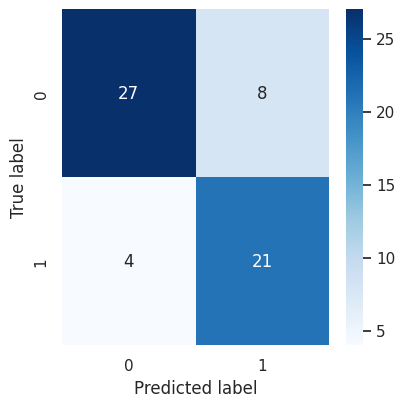

In [ ]:
# Function that plots confusion matrix
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(4, 4))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
predictions = list(map(lambda x: np.argmax(x), normal_model.predict(test_set)))


# Graficamos nuestra martis de confusion
plot_confusion_matrix(labels=test_target, predictions=predictions)